In [11]:

from pathlib import Path

pathlist = Path("./movies").rglob('*.gml')
for path in pathlist:


movies/starwars_v.gml
movies/pulp_fiction.gml
movies/godfather_ii.gml
movies/lordrings_returnking.gml
movies/bladerunner.gml


In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm

pulp = nx.read_gml("./movies/pulp_fiction.gml")

communities = nx_comm.louvain_communities(pulp, weight='value', resolution=1, threshold=1e-07, seed=None)

print(communities)

nx_comm.modularity(pulp, communities, weight='value')

[{'CAPT KOONS', 'VINCENT', 'JODY', 'WOMAN', 'ENGLISH DAVE', 'ED SULLIVAN', 'LANCE', 'MIA', 'MOTHER', 'PREACHER', 'BUDDY'}, {'THE GIMP', 'ZED', 'MAYNARD'}, {'HONEY BUNNY', 'MANAGER', 'PUMPKIN', 'PATRON', 'WAITRESS', 'YOUNG WOMAN', 'YOUNG MAN'}, {'BRETT', 'ROGER', 'MARVIN', 'MARSELLUS', 'BUTCH', 'FABIENNE', 'ESMARELDA', 'PEDESTRIAN', 'GAWKER #2'}, {'JIMMIE', 'THE WOLF', 'JULES', 'WINSTON', 'RAQUEL', 'FOURTH MAN'}, {'SPORTSCASTER #2', 'SPORTSCASTER #1'}]


0.38728086194302414

In [40]:
nx_comm.modularity(pulp, communities, weight='value')

NameError: name 'communities' is not defined

drawing stuff

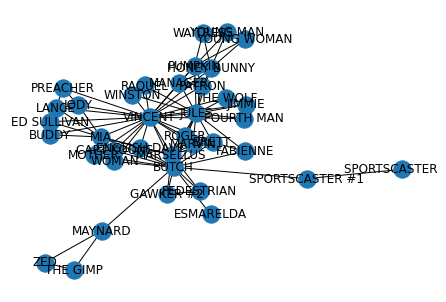

In [4]:
nx.draw(pulp, with_labels=True)

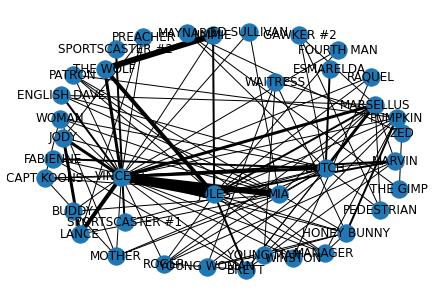

In [16]:
weights = nx.get_edge_attributes(pulp,'value').values()
pos = nx.spring_layout(pulp, k=100/len(pulp.nodes))
nx.draw(pulp, pos, width=list(weights), with_labels=True)

https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx

In [44]:
communities = nx_comm.louvain_communities(pulp, weight='value', resolution=1, threshold=1e-07, seed=None)
for community in communities:
    for node in community:
        pulp.nodes[node]["cluster"] = community



color palettes:
in seaborn, why not
[link](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [50]:
import seaborn as sns


for community in communities:
    community["color"] = palette[i]
    i = i + 1

TypeError: 'set' object does not support item assignment

In [52]:
communities = nx_comm.louvain_communities(pulp, weight='value', resolution=1, threshold=1e-07, seed=None)

palette = sns.color_palette("hls", len(communities))

for community in communities:
    for node in community:
        pulp.nodes[node]["cluster"] = community
        index = communities.index(community)
        pulp.nodes[node]["color"] = palette[index]


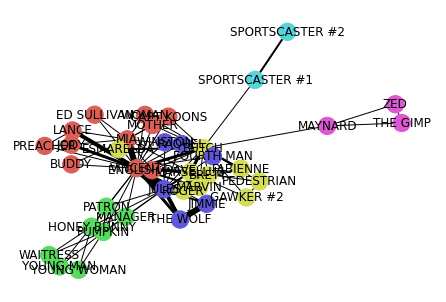

In [58]:
colors = nx.get_node_attributes(pulp,'color').values()

weights = nx.get_edge_attributes(pulp,'value').values()
pos = nx.spring_layout(pulp, k=None)


nx.draw(pulp, pos, width=list(weights), node_color=list(colors), with_labels=True)


In [64]:


pathlist = Path("./movies").rglob('*.gml')
graphs = []
for path in pathlist:
    graphs.append(nx.read_gml(path))

